In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import race as R

In [3]:
def train_agent(agent, n=10000):
    from tqdm import tqdm
    gains = []
    for k in tqdm(range(n)):
        g = agent.run_episode()
        gains.append(g)
    return gains

In [4]:
race1 = R.RaceTrack(R.track1,2)
race3 = R.RaceTrack(R.track3,2)
race4 = R.RaceTrack(R.track4,3)
race5 = R.RaceTrack(R.track5,4)

In [96]:
race1.print()

##########
###...F###
###...F###
##...#####
##...#####
##C#######
##########



In [6]:
race3.print()

###############
###.......#####
###........####
##....##....###
##...####...###
##SCS####...###
######F.....###
######F....####
###############



In [10]:
race4.print()

###############
###.......#####
###........####
##....##....###
##...####...###
##SCS####...###
######......###
#FF##......####
#..#..#########
#..#...########
#..##...#######
#..###....#####
#..###.....####
##..##......###
##..####....###
###.........###
######.....####
###############



In [98]:
race5.print()

################
####.......#####
####........####
###....##....###
###...####...###
###CSS####...###
#######......###
#FFF##......####
#...#...########
#...#...########
#...##...#######
#...###....#####
#...####....####
#....####....###
##....###....###
##...........###
###.........####
######....######
################



In [5]:
import table_algos as TA

In [6]:
sarsa = TA.Sarsa(race5)
gains_sarsa  = train_agent(sarsa, n=10000)

100%|██████████| 10000/10000 [00:14<00:00, 712.44it/s]


In [7]:
n1_sarsa = TA.NStepSarsa(race5, 2)
gains_n1_sarsa  = train_agent(n1_sarsa, n=10000)

100%|██████████| 10000/10000 [00:15<00:00, 629.80it/s]


In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
n5_sarsa = TA.NStepSarsa(race5, 5)
gains_n5_sarsa  = train_agent(n5_sarsa, n=10000)

100%|██████████| 10000/10000 [00:43<00:00, 231.56it/s]


In [13]:
n10_sarsa = TA.NStepSarsa(race5, 10)
gains_n10_sarsa  = train_agent(n10_sarsa, n=10000)

100%|██████████| 10000/10000 [00:59<00:00, 168.27it/s]


In [14]:
n2_sarsa = TA.NStepSarsa(race5, 2)
gains_n2_sarsa  = train_agent(n2_sarsa, n=10000)

100%|██████████| 10000/10000 [00:13<00:00, 732.35it/s]


In [17]:
from collections import OrderedDict
gains = OrderedDict()
for s in range(1,10):
    print('Step', s)
    gs = []
    for k in range(5):
        n_sarsa = TA.NStepSarsa(race5, s)
        g = train_agent(n_sarsa, n=10000)
        gs.append(g)
    gains[s] = gs
    
    
    

  0%|          | 3/10000 [00:00<05:40, 29.38it/s]

Step 1


  0%|          | 12/10000 [00:00<03:19, 50.12it/s]

Step 2


  1%|          | 76/10000 [00:00<01:26, 114.73it/s]

Step 3


  4%|▍         | 384/10000 [00:03<01:28, 108.92it/s]

Step 4


  1%|▏         | 133/10000 [00:01<02:20, 70.05it/s]

Step 5


  1%|          | 107/10000 [00:01<03:03, 53.94it/s]

Step 6


  1%|          | 109/10000 [00:03<05:42, 28.86it/s]

Step 7


  1%|          | 75/10000 [00:02<05:33, 29.76it/s]

Step 8


  0%|          | 20/10000 [00:00<05:18, 31.33it/s]

Step 9


100%|██████████| 10000/10000 [01:11<00:00, 139.56it/s]


In [31]:
gs = []
for k in range(5):
        sarsa = TA.Sarsa(race5)
        g = train_agent(sarsa, n=10000)
        gs.append(g)
gains[0] = gs

100%|██████████| 10000/10000 [00:13<00:00, 717.67it/s]


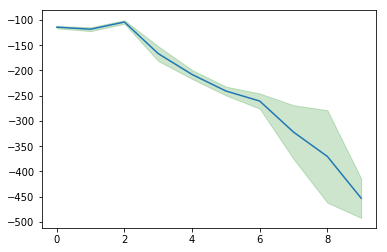

In [34]:
xs = list(sorted(gains.keys()))
mgs = []
vgs = []
for s in xs:
    ms = np.mean(gains[s], axis=1)
    v = np.std(ms)
    m = np.mean(ms)
    mgs.append(m)
    vgs.append(v)
mgs = np.array(mgs)
vgs = np.array(vgs)
plt.plot(mgs)
plt.fill_between(np.array(xs), mgs - vgs, mgs+vgs, alpha=0.2, color='g')

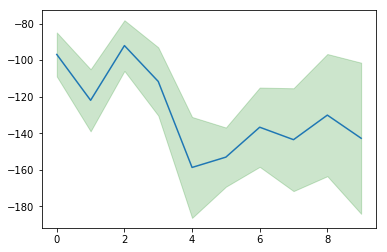

In [46]:
xs = list(sorted(gains.keys()))
mgs = []
vgs = []
for s in xs:
    ms = np.mean(np.array(gains[s])[:,9000:10000], axis=1)
    v = np.std(ms)
    m = np.mean(ms)
    mgs.append(m)
    vgs.append(v)
mgs = np.array(mgs)
vgs = np.array(vgs)
plt.plot(mgs)
plt.fill_between(np.array(xs), mgs - vgs, mgs+vgs, alpha=0.2, color='g')

In [27]:
vgs

array([ 3.82597849,  3.52039022, 14.55769866,  8.82237449,  8.66279076,
       15.13068543, 53.15993006, 91.53915772, 39.06235502])

sarsa_mean -122.2953
n1_sarsa_mean -118.6473
n2_sarsa_mean -98.5221
n5_sarsa_mean -295.7358
n10_sarsa_mean -384.6194


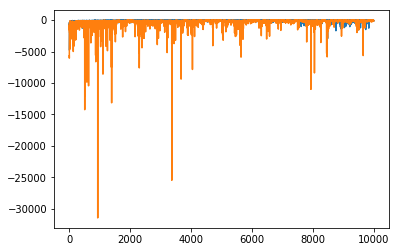

In [15]:
plt.plot(gains_sarsa)
plt.plot(gains_n5_sarsa)
print('sarsa_mean', np.mean(gains_sarsa))
print('n1_sarsa_mean', np.mean(gains_n1_sarsa))
print('n2_sarsa_mean', np.mean(gains_n2_sarsa))
print('n5_sarsa_mean', np.mean(gains_n5_sarsa))
print('n10_sarsa_mean', np.mean(gains_n10_sarsa))

In [ ]:
race3 = R.RaceTrack(R.track3,3)
sarsa3 = TA.Sarsa(race3)
gains3 = []
for k in tqdm(range(100000)):
    g = sarsa3.run_episode()
    gains3.append(g)


In [ ]:
ql3 = TA.QLearning(race3)

In [ ]:
qgains = []

In [ ]:
for k in tqdm(range(10000)):
    g = ql3.run_episode(eps=0)
    qgains.append(g)

In [ ]:
plt.plot(gains3)
plt.plot(qgains)

In [ ]:
ql3.run_episode(callback=lambda: race3.print(),eps=0)
race3.state_log

In [ ]:
def exp_mean_std(series, alpha=0.1):
    import math
    import numpy as np
    
    means = []
    stds = []
    
    mean = series[0]
    sqr_mean = mean**2
    
    for v in series:
        mean += alpha * (v - mean)
        sqr_mean += alpha * (v**2 - sqr_mean)
        means.append(mean)
        stds.append(math.sqrt(sqr_mean - mean**2))
    return np.array(means), np.array(stds)

In [ ]:
mgains, sgains = exp_mean_std(gains3, alpha=0.01)
plt.plot(mgains)
plt.fill_between(range(len(sgains)), mgains-sgains, mgains+sgains, alpha=0.2, color='green')

In [ ]:
race4 = R.RaceTrack(R.track4,5)
ql4 = TA.QLearning(race4)
qgains4_01 = []

In [ ]:
ql4_2 = TA.QLearning(race4)
qgains4_02 = []

In [ ]:
ql4_3 = TA.QLearning(race4)
qgains4_005 = []

In [ ]:
for k in tqdm(range(10000)):
    g = ql4.run_episode(eps=0.1)
    qgains4_01.append(g)
    

In [ ]:
%matplotlib inline
plt.plot(qgains4_01)
plt.plot(qgains4_02)
plt.plot(qgains4_005)

In [ ]:
ql4.run_episode(callback=lambda: race4.print(), eps=0.0)

In [9]:
mc = TA.MonteCarlo(race3)
gain_mc = train_agent(mc, 5000)

100%|██████████| 5000/5000 [00:14<00:00, 351.42it/s]


# Reinforce!!!

In [10]:
import reinforce as RF
from tensorboardX import SummaryWriter

In [11]:
rf_race = race3

In [12]:
writer=SummaryWriter('logs/track3_h200_g0.99_norm_lr0.001_value__centered_try3')
policy = RF.Policy(rf_race, hidden=200)
value = RF.Values(rf_race, hidden=128)
trainer = RF.Trainer(rf_race, policy, value=value, writer=writer, lr=1e-3, max_len=200, gamma=0.99)

In [13]:
rf_gains = train_agent(trainer, n=5000)

100%|██████████| 5000/5000 [01:24<00:00, 59.02it/s]


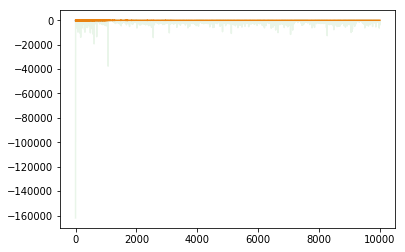

In [223]:
plt.plot(gains_sarsa)
plt.plot(rf_gains)
plt.plot(gains_mc, alpha=0.1)



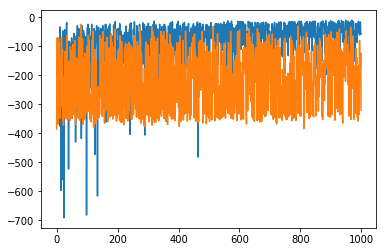

In [46]:
import torch
import numpy as np

In [47]:
for n, p in policy.named_parameters():
    print(n, p.norm())

affine1.weight tensor(11.9120, grad_fn=<NormBackward0>)
affine1.bias tensor(3.9339, grad_fn=<NormBackward0>)
affine2.weight tensor(5.3020, grad_fn=<NormBackward0>)
affine2.bias tensor(0.1869, grad_fn=<NormBackward0>)


In [48]:
import torch
rf_race.reset()
policy.forward(torch.FloatTensor(rf_race.get_state()).unsqueeze(0))

tensor([[0.0051, 0.8761, 0.0012, 0.1173, 0.0003]], grad_fn=<SoftmaxBackward>)

In [49]:
dirs = np.zeros(rf_race.get_sizes())
probs = np.zeros(rf_race.get_sizes())
values = np.zeros(rf_race.get_sizes())

for i in range(rf_race.get_sizes()[0]):
    for j in range(rf_race.get_sizes()[1]):
        vr = 1; vc = 2;
        aprobs = policy.forward(torch.FloatTensor([i,j,vr,vc]).unsqueeze(0))[0]
        a = aprobs.argmax().item()
        dirs[i,j,vr,vc] = a
        probs[i,j,vr,vc] = aprobs[a].item()
        val = value.forward(torch.FloatTensor([i,j,vr,vc]).unsqueeze(0))[0]
        values[i,j,vr,vc] = val

In [50]:
v = policy.forward(torch.FloatTensor(rf_race.get_state()).unsqueeze(0))

In [51]:
probs[:,:,2,2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [52]:
xs,ys = np.meshgrid(range(rf_race.get_sizes()[0]), range(rf_race.get_sizes()[1]), indexing='ij')

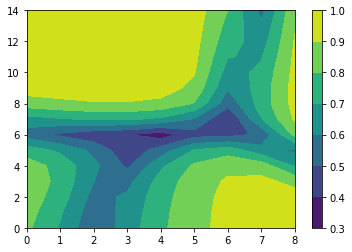

In [53]:
import matplotlib.pyplot as plt
plt.contourf(xs,ys, probs[:,:,1,2])
plt.colorbar()

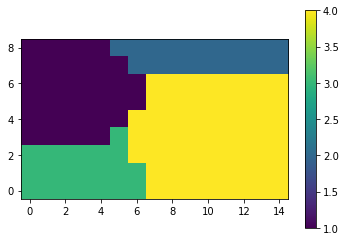

In [54]:
plt.imshow(dirs[:,:,1,2], origin='lower')
plt.colorbar()

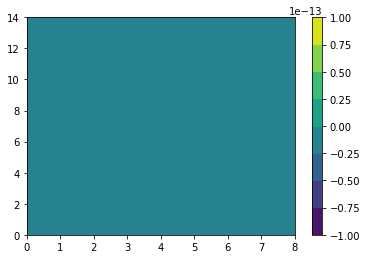

In [57]:
plt.contourf(xs,ys, values[:,:,2,2])
plt.colorbar()

In [179]:
policy.forward(torch.FloatTensor(rf_race.get_state()).unsqueeze(0))

tensor([[0.0102, 0.0015, 0.9880, 0.0000, 0.0003]], grad_fn=<SoftmaxBackward>)

In [201]:
rf_race.act(1)

('CONT', (4, 3, -1, 0), -1)

In [60]:
values.min()

0.0